# Train a ConvNet!
We now have a generic solver and a bunch of modularized layers. It's time to put it all together, and train a ConvNet to recognize the classes in CIFAR-10. In this notebook we will walk you through training a simple two-layer ConvNet and then set you free to build the best net that you can to perform well on CIFAR-10.


In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from classifier_trainer import ClassifierTrainer
from gradient_check import eval_numerical_gradient
from convnet import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):

    # Load the raw CIFAR-10 data
    cifar10_dir = './datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    # Transpose so that channels come first
    X_train = X_train.transpose(0, 3, 1, 2).copy()
    X_val = X_val.transpose(0, 3, 1, 2).copy()
    x_test = X_test.transpose(0, 3, 1, 2).copy()

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3, 32, 32)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3, 32, 32)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


# Sanity check loss
After you build a new network, one of the first things you should do is sanity check the loss. When we use the softmax loss, we expect the loss for random weights (and no regularization) to be about `log(C)` for `C` classes. When we add regularization this should go up.

In [3]:
model = init_two_layer_convnet()

X = np.random.randn(100, 3, 32, 32)
y = np.random.randint(10, size=100)

loss, _ = two_layer_convnet(X, model, y, reg=0)

# Sanity check: Loss should be about log(10) = 2.3026
print ('Sanity check loss (no regularization): ', loss)

# Sanity check: Loss should go up when you add regularization
loss, _ = two_layer_convnet(X, model, y, reg=1)
print ('Sanity check loss (with regularization): ', loss)

(100, 8192) (100, 32, 16, 16) (8192, 10)
Sanity check loss (no regularization):  2.30249696824
(100, 8192) (100, 32, 16, 16) (8192, 10)
Sanity check loss (with regularization):  2.34458821064


# Gradient check
After the loss looks reasonable, you should always use numeric gradient checking to make sure that your backward pass is correct. When you use numeric gradient checking you should use a small amount of artifical data and a small number of neurons at each layer.

In [5]:
num_inputs = 2
input_shape = (3, 16, 16)
reg = 0.0
num_classes = 10
X = np.random.randn(num_inputs, *input_shape)
y = np.random.randint(num_classes, size=num_inputs)

model = init_two_layer_convnet(num_filters=3, filter_size=3, input_shape=input_shape)
loss, grads = two_layer_convnet(X, model, y)
for param_name in sorted(grads):
    f = lambda _: two_layer_convnet(X, model, y)[0]
    param_grad_num = eval_numerical_gradient(f, model[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print ('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192) (2, 3, 8, 8) (192, 10)
(2, 192)

In [6]:
# Use a two-layer ConvNet to overfit 50 training examples.

model = init_two_layer_convnet()
trainer = ClassifierTrainer()
best_model, loss_history, train_acc_history, val_acc_history = trainer.train(
          X_train[:50], y_train[:50], X_val, y_val, model, two_layer_convnet,
          reg=0.001, momentum=0.9, learning_rate=0.0001, batch_size=10, num_epochs=10,
          verbose=True)

starting iteration  0
(10, 8192) (10, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(1000, 8192) (1000, 32, 16, 16) (8192, 10)
Finished epoch 0 / 10: cost 2.329738, train: 0.100000, val 0.069000, lr 1.000000e-04
(10, 8192) (10, 32, 16, 16) (8192, 10)
(10, 8192) (10, 32, 16, 16) (8192, 10)
(10, 8192) (10, 32, 16, 16) (8192, 10)
(10, 8192) (10, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(1000, 8192) (1000, 32, 16, 16) (8192, 10)
Finished epoch 1 / 10: cost 2.237591, train: 0.160000, val 0.112000, lr 9.500000e-05
(10, 8192) (10, 32, 16, 16) (8192, 10)
(10, 8192) (10, 32, 16, 16) (8192, 10)
(10, 8192) (10, 32, 16, 16) (8192, 10)
(10, 8192) (10, 32, 16, 16) (8192, 10)
(10, 8192) (10, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(1000, 8192) (1000, 32, 16, 16) (8192, 10)
Finished epoch 2 / 10: cost 1.942858, train: 0.300000, val 0.126000, lr 9.025000e-05
starting iteration  10
(10, 8192) (10, 32, 16, 16) (8192, 10)
(10, 8192) (10, 32, 16, 1

Plotting the loss, training accuracy, and validation accuracy should show clear overfitting:

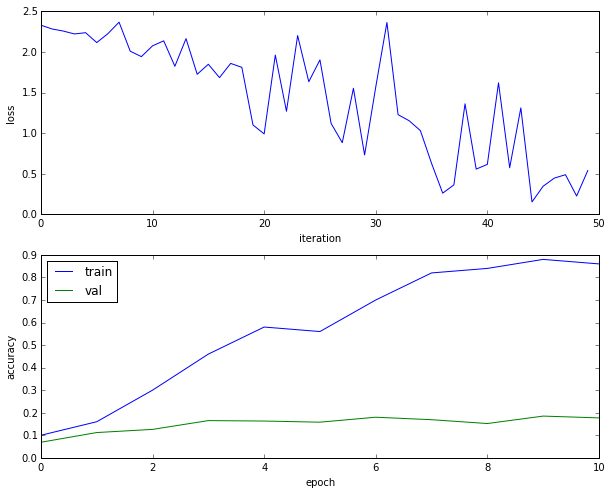

In [7]:
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model = init_two_layer_convnet(filter_size=7)
trainer = ClassifierTrainer()
best_model, loss_history, train_acc_history, val_acc_history = trainer.train(
          X_train, y_train, X_val, y_val, model, two_layer_convnet,
          reg=0.001, momentum=0.9, learning_rate=0.0001, batch_size=50, num_epochs=1,
          acc_frequency=50, verbose=True)

starting iteration  0
(50, 8192) (50, 32, 16, 16) (8192, 10)
(1000, 8192) (1000, 32, 16, 16) (8192, 10)
(1000, 8192) (1000, 32, 16, 16) (8192, 10)
Finished epoch 0 / 1: cost 2.302883, train: 0.122000, val 0.109000, lr 1.000000e-04
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
starting iteration  10
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
(50, 8192) (50, 32, 16, 16) (8192, 10)
start

# Visualize weights
We can visualize the convolutional weights from the first layer. If everything worked properly, these will usually be edges and blobs of various colors and orientations.

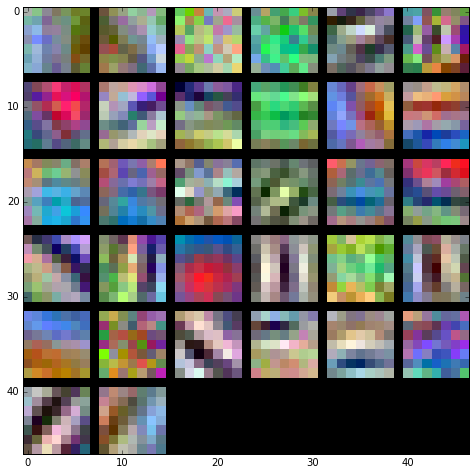

In [9]:
from vis_utils import visualize_grid

grid = visualize_grid(best_model['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))